In [27]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interpolate

In [2]:
PATH_ROOT = Path(os.getcwd()).absolute().parent
print(PATH_ROOT)

/home/lukec/workspace/label_flip_revised


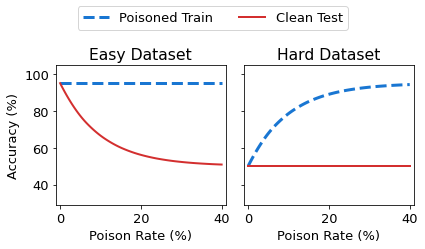

In [76]:
FONTSIZE = 13
FIGSIZE = (6, 3)

x = np.linspace(0, 40, num=10, endpoint=True)

y1 = 100 * np.exp(-0.1 * (x + 8)) + 50
f1 = interpolate.interp1d(x, y1, kind='quadratic')

y2 = -100 * np.exp(-0.1 * (x + 8)) + 95
f2 = interpolate.interp1d(x, y2, kind='quadratic')

xx = np.linspace(0, 40, num=100, endpoint=True)

colors = {
    'red': '#d32f2f',
    'blue': '#1976d2',
}

def draw_lineplot(x_train, y_train, x_test, y_test, title, ax):
    ax.plot(x_train, y_train, label='Poisoned Train', linestyle='--', linewidth=3, c=colors['blue'])
    ax.plot(x_test, y_test, label='Clean Test', linewidth=2, c=colors['red'])
    ax.set(xlim=[-1, 41], ylim=[29, 105])
    ax.set_title(title)
    ax.set_xlabel('Poison Rate (%)')

plt.rcParams['font.size'] = FONTSIZE
fig, axs = plt.subplots(1, 2, sharey=True, sharex=True, figsize=FIGSIZE)
axs[0].set_ylabel('Accuracy (%)')
draw_lineplot(xx, 95*np.ones_like(xx), xx, f1(xx), 'Easy Dataset', axs[0])
draw_lineplot(xx, f2(xx), xx, 50*np.ones_like(xx), 'Hard Dataset', axs[1])

(lines, labels) = axs[0].get_legend_handles_labels()
fig.legend(lines, labels, bbox_to_anchor=(0, 1, 1, 0), loc="lower center", ncol=2)
plt.tight_layout(pad=0.8)
path_fig_out = os.path.join(PATH_ROOT, 'results', 'fake_acc.pdf', )
plt.savefig(path_fig_out, dpi=300, bbox_inches='tight')
